In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  

In [2]:
cust_id_location = pd.read_csv('olist_customers_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
product_metadata=pd.read_csv('olist_products_dataset.csv')
english_name = pd.read_csv('product_category_name_translation.csv')
ord_fulfillment_timeline = pd.read_csv('olist_orders_dataset.csv')
ord_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
pay_data = pd.read_csv('olist_order_payments_dataset.csv')
zip_code = pd.read_csv('olist_geolocation_dataset.csv')

In [3]:
print(cust_id_location.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


In [4]:
print(cust_id_location.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [5]:
cust_id_location.duplicated().value_counts()

False    99441
Name: count, dtype: int64

In [6]:
#产品数据，将英文名称付给产品
print(product_metadata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


In [7]:
product_meta_data = pd.merge(product_metadata,english_name,on = 'product_category_name')
print(product_meta_data.head(3))
product_meta_data.to_csv('product_meta_data.csv',index = False)

                         product_id product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                 artes   
2  96bd76ec8810374ed1b65e291975717f         esporte_lazer   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1000.0               30.0               18.0              20.0   
2             154.0               18.0                9.0              15.0   

  product_category_name_english  
0                     perfumery  
1                           art  
2                sports_leisure  


In [8]:
#对order——intems表进行处理，可能要得到订单的总价值等信息表
print(order_items.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


In [9]:
#时间处理
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'],format='mixed') 

In [10]:
print(order_items)

                                order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242a

In [11]:
#处理空值
print(order_items.isnull().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [12]:
#检查每个订单编号
# 确保每个订单的Sequential Number连续且唯一
df_grouped = order_items.groupby('order_id')['order_item_id'].agg(['min', 'max', 'count'])
df_grouped['expected_max'] = df_grouped['count']
invalid_orders = df_grouped[df_grouped['max'] != df_grouped['expected_max']]
print(invalid_orders)
print(f"存在序列号不连续的订单数：{len(invalid_orders)}")

Empty DataFrame
Columns: [min, max, count, expected_max]
Index: []
存在序列号不连续的订单数：0


In [13]:
# 检测价格异常（如负值或超过3倍标准差）
price_mean = order_items['price'].mean()
price_std = order_items['price'].std()
invalid_price = order_items[(order_items['price']<0)&(order_items['price']>price_mean+3*price_std)]
print(invalid_price)
invalid_fr_values = order_items[(order_items['freight_value']<0)]

Empty DataFrame
Columns: [order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value]
Index: []


In [14]:
print(order_items.info())
order_items['one_value'] = order_items['price']+order_items['freight_value']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None


In [15]:
print(order_items)

                                order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242a

In [16]:
order_items.to_csv('order_items1.csv',index = False)

In [17]:
# 计算订单总金额和总运费
order_summary = order_items.groupby('order_id').agg(
    item_count=('product_id', 'count'),
    total_price=('price', 'sum'),
    total_freight=('freight_value', 'sum')
).reset_index()
order_summary['order_id'].duplicated().sum()
order_summary['total_cost'] = order_summary['total_price']+order_summary['total_freight']
order_summary = pd.merge(order_summary,ord_fulfillment_timeline[['order_id','order_purchase_timestamp']],on='order_id')
order_summary=order_summary.rename(columns={'order_purchase_timestamp':'data'})
print(order_summary)
order_summary.to_csv('order_summary.csv',index = False)
# 尝试确认每个订单组其他量都是相同的
# 但是得到结果有多个订单都不同只能使用第一种方法
# con_check = order_items.groupby('order_id').agg({
#     'product_id':'nunique',
#     'seller_id':'nunique',
#     'shipping_limit_date':'nunique'    
# }).reset_index()
# print(con_check)
# print(con_check[con_check['product_id']>1])
# a = con_check[['product_id','seller_id','shipping_limit_date']].sum()
# print(a)

                               order_id  item_count  total_price  \
0      00010242fe8c5a6d1ba2dd792cb16214           1        58.90   
1      00018f77f2f0320c557190d7a144bdd3           1       239.90   
2      000229ec398224ef6ca0657da4fc703e           1       199.00   
3      00024acbcdf0a6daa1e931b038114c75           1        12.99   
4      00042b26cf59d7ce69dfabb4e55b4fd9           1       199.90   
...                                 ...         ...          ...   
98661  fffc94f6ce00a00581880bf54a75a037           1       299.99   
98662  fffcd46ef2263f404302a634eb57f7eb           1       350.00   
98663  fffce4705a9662cd70adb13d4a31832d           1        99.90   
98664  fffe18544ffabc95dfada21779c9644f           1        55.99   
98665  fffe41c64501cc87c801fd61db3f6244           1        43.00   

       total_freight  total_cost                 data  
0              13.29       72.19  2017-09-13 08:59:02  
1              19.93      259.83  2017-04-26 10:53:06  
2              

In [18]:
#接下来将找出商品的畅销榜
#首先将产品名称和订单表连接起来
hot_product = pd.merge(order_items,product_meta_data[['product_id','product_category_name']],on='product_id')

product_category_name
cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
Name: 售卖数量, dtype: int64


<Axes: xlabel='product_category_name'>

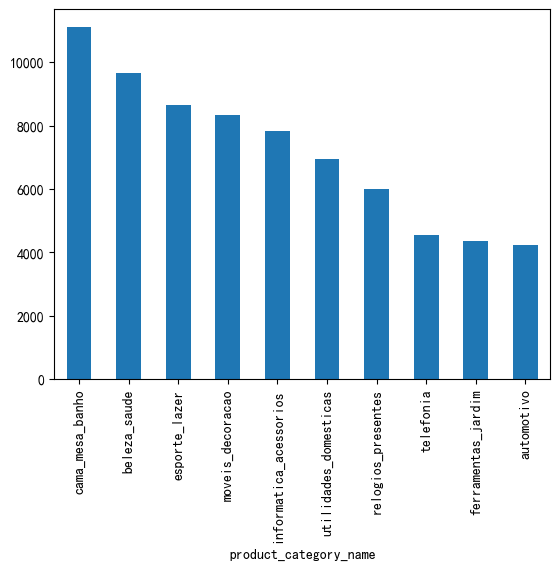

In [19]:
hot_product1=hot_product.groupby('product_category_name').count().sort_values('order_id',ascending=False)
hot_product1['售卖数量']=hot_product1['order_id']
hot_product1=hot_product1['售卖数量']
print(hot_product1.head(10))
hot_product1.head(10).plot(kind='bar')

In [20]:
print(ord_fulfillment_timeline.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


In [21]:
#处理买卖物流时间数据，分析物流速度
datatime_col = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']
for col in datatime_col:
    ord_fulfillment_timeline[col] = pd.to_datetime(ord_fulfillment_timeline[col],format = 'mixed')

In [22]:
print(ord_fulfillment_timeline.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
None


In [23]:
print(ord_fulfillment_timeline.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [24]:
print(ord_fulfillment_timeline[ord_fulfillment_timeline['order_delivered_customer_date'].isnull()]['order_status'].value_counts())

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: count, dtype: int64


In [25]:
#将送达但是没有送达时间的脏数据处理
invalid_deliverded = ord_fulfillment_timeline[(ord_fulfillment_timeline['order_status'] == 'delivered')&(ord_fulfillment_timeline['order_delivered_customer_date'].isnull())]
ord_fulfillment_timeline = ord_fulfillment_timeline.drop(invalid_deliverded.index)

In [26]:
print(ord_fulfillment_timeline.info())

<class 'pandas.core.frame.DataFrame'>
Index: 99433 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99433 non-null  object        
 1   customer_id                    99433 non-null  object        
 2   order_status                   99433 non-null  object        
 3   order_purchase_timestamp       99433 non-null  datetime64[ns]
 4   order_approved_at              99273 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97651 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99433 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.8+ MB
None


In [27]:
print(ord_fulfillment_timeline[ord_fulfillment_timeline['order_delivered_customer_date'].isnull()]['order_status'].value_counts())

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
created           5
approved          2
Name: count, dtype: int64


In [28]:
# 最会决定将所有空值行删除，毕竟对于数据量10w来说还是比较小
ord_fulfillment_timeline=ord_fulfillment_timeline.dropna()
print(ord_fulfillment_timeline.info())

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB
None


0    6 days 01:30:13
1   12 days 00:56:45
2    9 days 04:16:29
3    9 days 10:48:43
4    1 days 22:30:28
Name: 相距时间, dtype: timedelta64[ns]


count    93748.000000
mean         9.135427
std          8.737512
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        205.000000
Name: 相距时间, dtype: float64

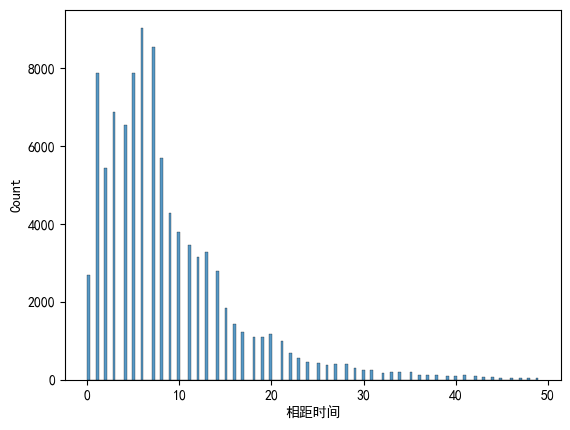

In [29]:
#获取发货到收货时间差距
ord_fulfillment_timeline['相距时间'] = ord_fulfillment_timeline['order_delivered_customer_date'] - ord_fulfillment_timeline['order_delivered_carrier_date']
print(ord_fulfillment_timeline['相距时间'].head())
#将时间数据类型转换int
ord_fulfillment_timeline['相距时间'] = ord_fulfillment_timeline['相距时间'].map(lambda x:x.days)
#发现有相距时间为负值继续处理数据 ,考虑到脏数据数据量不大暂不处理,将数据删除并保持处理后的的数据
time_error = ord_fulfillment_timeline[ord_fulfillment_timeline['相距时间']<0]
ord_fulfillment_timeline = ord_fulfillment_timeline.drop(time_error.index)
ord_fulfillment_timeline.to_csv('ord_fulfillment_timeline.csv',index = False)
# print(ord_fulfillment_timeline[ord_fulfillment_timeline['相距时间']<0].count())
# print(ord_fulfillment_timeline[ord_fulfillment_timeline['相距时间']<0].head())
# ax = sns.histplot(ord_fulfillment_timeline[(ord_fulfillment_timeline['order_status']=='delivered')&(ord_fulfillment_timeline['相距时间']>0)]['相距时间'], bins='auto') 
# 考虑到删除了负值时间和空值数据且大多数送达时间都是在50天之内所以我们着重看50天内的变化

ax = sns.histplot(ord_fulfillment_timeline[(ord_fulfillment_timeline['order_status']=='delivered')&(ord_fulfillment_timeline['相距时间']<50)]['相距时间'], bins='auto')
# ord_fulfillment_timeline[(ord_fulfillment_timeline['order_status']=='delivered')]['相距时间'].plot(kind='hist',bins = 50)
# ord_fulfillment_timeline[(ord_fulfillment_timeline['order_status']=='delivered')&(ord_fulfillment_timeline['相距时间']>0)]['相距时间'].mode()
# 可以看出大多数物流时间都在6天左右
ord_fulfillment_timeline[(ord_fulfillment_timeline['order_status']=='delivered')&(ord_fulfillment_timeline['相距时间']>0)]['相距时间'].describe()

In [30]:
print(ord_fulfillment_timeline['customer_id'].duplicated().sum())

0


In [31]:
#计算复购率
# agin_buy=cust_id_location.groupby('customer_unique_id').count()['customer_id'].count()#['customer_state'].sum()
agin_buy=cust_id_location['customer_unique_id'].duplicated().sum()#客户唯一值与订单客户差值

agin_buy2=cust_id_location['customer_id'].count()#所有订单客户值
agin_buy3=agin_buy/agin_buy2
print('{:.2%}'.format(agin_buy3))


3.36%


In [32]:
print(ord_reviews)

                              review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4            

In [33]:
print(ord_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


In [34]:
datatime_col1 = ['review_creation_date','review_answer_timestamp']
for col in datatime_col1:
    ord_reviews[col] = pd.to_datetime(ord_reviews[col],format = 'mixed')
# review数据中有评论等列为空，容易造成在导入tableau中出现问题所以将其排除写入新的csv
ord_reviews.to_csv('review.csv',columns = ['review_id','order_id','review_score','review_creation_date','review_answer_timestamp'],index = False)

In [35]:
print(ord_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB
None


In [36]:
# 可以看到多数人还是打出5星好评
print(ord_reviews['review_score'].mode())

0    5
Name: review_score, dtype: int64


In [37]:
# 平均分数为4分
ord_reviews['review_score'].describe()

count    99224.000000
mean         4.086421
std          1.347579
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

In [38]:
#尝试将review和产品订单联系起来，查看各产品的订单评分
re_prod = pd.merge(ord_reviews,order_items[['order_id','product_id']],on = 'order_id')

In [39]:
# re_prod = pd.merge(re_prod,product_meta_data[['product_id','product_category_name']]on='product_id')

In [40]:
# 求个产品评分平均值
re_prod1 = re_prod.groupby('product_id')['review_score'].mean()

In [41]:
# 将各产品名称连接
re_prod1 = pd.merge(re_prod1,product_meta_data[['product_id','product_category_name']],on='product_id')

In [42]:
re_prod1 = re_prod1.sort_values('review_score')

In [43]:
# 评分最低的
print(re_prod1.head(10))

                             product_id  review_score   product_category_name
18099  8fdce6f1db3b75b035989f673164487e           1.0         cama_mesa_banho
205    01a0f7d0d081d619be810e512be45f97           1.0         cama_mesa_banho
218    01b0238705b6ae8e35c6fea837e6ae4a           1.0            beleza_saude
224    01bacce2c74317ed2524bcaabae2e9d4           1.0   utilidades_domesticas
227    01c2e91674406ebaca6a1bbf7f61c3f0           1.0  informatica_acessorios
27993  de37ff8068c8e7b1164a19f0f4d05619           1.0         casa_construcao
27999  de41aaf0880256b515a29b86285a45c7           1.0           esporte_lazer
31995  fec2d939a171210847d8f2d102f0dba5           1.0      ferramentas_jardim
106    00efb9a8ce0cf3b2f37892ab003edc10           1.0           esporte_lazer
17997  8f08d9a3c02538bfb6110150a8bbad07           1.0   utilidades_domesticas


In [44]:
# 高评分
print(re_prod1.tail(10))

                             product_id  review_score   product_category_name
18124  90147b75b794b38e8a6e69b3657430fd           5.0         cama_mesa_banho
18125  9019140ff0a590950d16c4e5ae5427f6           5.0   utilidades_domesticas
18142  904df51afc994cd2a7bce1ec3ff5d9fe           5.0               papelaria
18143  90509918fbc0f45016520d833ae25f78           5.0            market_place
18146  9059b4009ee73aff5c683ea3b9307604           5.0        moveis_decoracao
18148  905b0c0ebfb5ea28af1b5cfb97bbbd27           5.0  fashion_roupa_feminina
18135  90375e3ead4149e7ce79f04c8f6c0545           5.0              automotivo
18138  90467a0531183f8fd2cc76ca735df8a5           5.0        moveis_decoracao
18139  9047a9fe0b7e4175af012bfa793890cd           5.0              automotivo
18141  904a9e449fbfd90da738ab70ae6ca003           5.0             eletronicos


C:\Users\a1567\AppData\Local\Temp\ipykernel_1940\2148868440.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=re_prod1, x="review_score", shade=True)


<Axes: xlabel='review_score', ylabel='Density'>

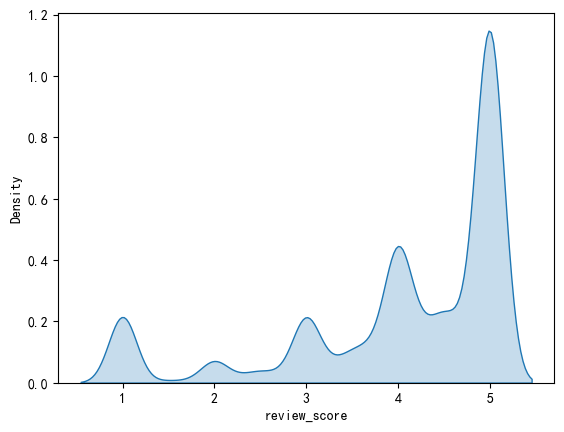

In [45]:
sns.kdeplot(data=re_prod1, x="review_score", shade=True)

In [46]:
# 对卖家数据进行处理
print(sellers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None


In [47]:
sellers.duplicated().value_counts()

False    3095
Name: count, dtype: int64

In [48]:
#对支付数据进行处理
print(pay_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


In [49]:
print(pay_data.describe())

       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000


In [50]:
# 发现有支付金额为0且没有使用代金卷的数据对其进行删除
# pay_data[pay_data['payment_value']<=0]
error_pay = pay_data[(pay_data['payment_value']<=0)&pay_data['payment_type']=='not_defined']
pay_data = pay_data.drop(error_pay.index)

In [51]:
# pay_data
pay_data.to_csv('payment.csv',index = False)

In [52]:
# 将订单金额表和订单数据的支付时间和支付金额连接起来,只连接数据中已经交货的,并且连接制服的金额
sales = pd.merge(order_summary,ord_fulfillment_timeline[ord_fulfillment_timeline['order_status']=='delivered'][['order_id','customer_id','order_delivered_customer_date']],on='order_id')
sales = pd.merge(sales,pay_data[['order_id','payment_value']],on = 'order_id')

In [53]:
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100707 entries, 0 to 100706
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100707 non-null  object        
 1   item_count                     100707 non-null  int64         
 2   total_price                    100707 non-null  float64       
 3   total_freight                  100707 non-null  float64       
 4   total_cost                     100707 non-null  float64       
 5   data                           100707 non-null  object        
 6   customer_id                    100707 non-null  object        
 7   order_delivered_customer_date  100707 non-null  datetime64[ns]
 8   payment_value                  100707 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 6.9+ MB
None


In [54]:
#年度销售额趋势
sales['year']=sales['order_delivered_customer_date'].dt.year
sales['month']=sales['order_delivered_customer_date'].dt.month


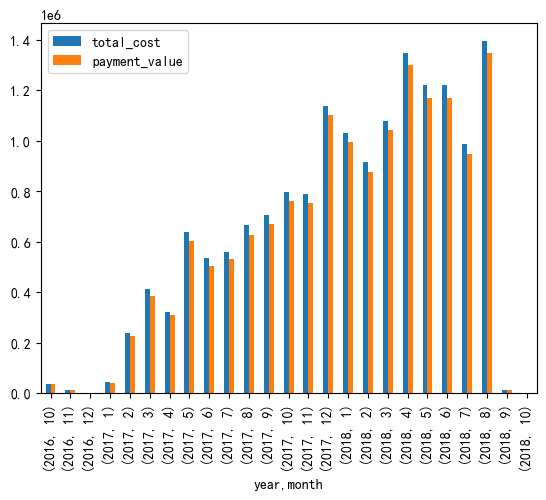

In [55]:
sales_year=sales.groupby(['year','month'])[['total_cost','payment_value']].sum()
sales_year.plot(kind='bar')
sales_year=sales_year.reset_index()

In [56]:
sales_year

,year,month,total_cost,payment_value
0,2016,10,34126.02,33779.57
1,2016,11,12407.21,11187.07
2,2016,12,960.85,960.85
3,2017,1,42186.91,38654.12
4,2017,2,239595.79,227429.29
5,2017,3,412441.26,385321.58
6,2017,4,322830.45,307722.84
7,2017,5,638650.56,600917.76
8,2017,6,535386.63,501698.05
9,2017,7,560219.03,529449.64


In [57]:
#计算增长率
# 月同比增长率
sales_year['同比增长率']=sales_year['total_cost'].pct_change(periods=12)
#环比增长率
sales_year['环比增长率']=sales_year['total_cost'].pct_change(periods=1)
sales_year=sales_year.fillna({'同比增长率':0,'环比增长率':0})
sales_year

,year,month,total_cost,payment_value,同比增长率,环比增长率
0,2016,10,34126.02,33779.57,0.000000,0.000000
1,2016,11,12407.21,11187.07,0.000000,-0.636430
2,2016,12,960.85,960.85,0.000000,-0.922557
3,2017,1,42186.91,38654.12,0.000000,42.905823
4,2017,2,239595.79,227429.29,0.000000,4.679387
5,2017,3,412441.26,385321.58,0.000000,0.721404
6,2017,4,322830.45,307722.84,0.000000,-0.217269
7,2017,5,638650.56,600917.76,0.000000,0.978285
8,2017,6,535386.63,501698.05,0.000000,-0.161691
9,2017,7,560219.03,529449.64,0.000000,0.046382


In [58]:
# sns.barplot(x='year',y='total_cost',data=sales_year)
# sns.barplot(x='year',y='payment_value',data=sales_year)

In [59]:
#热力图，各地区销售额分布
#受限将客户与销售额表连接起来
loc_sales=pd.merge(sales,cust_id_location,on='customer_id')

In [60]:
loc_sales

,order_id,item_count,total_price,total_freight,total_cost,data,customer_id,order_delivered_customer_date,payment_value,year,month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29,72.19,2017-09-13 08:59:02,3ce436f183e68e07877b285a838db11a,2017-09-20 23:43:48,72.19,2017,9,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93,259.83,2017-04-26 10:53:06,f6dd3ec061db4e3987629fe6b26e5cce,2017-05-12 16:04:24,259.83,2017,5,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,199.00,17.87,216.87,2018-01-14 14:33:31,6489ae5e4333f3693df5ad4372dab6d3,2018-01-22 13:19:16,216.87,2018,1,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79,25.78,2018-08-08 10:00:35,d4eb9395c8c0431ee92fce09860c5a06,2018-08-14 13:32:39,25.78,2018,8,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14,218.04,2017-02-04 13:57:51,58dbd0b2d70206bf40e62cd34e84d795,2017-03-01 16:42:31,218.04,2017,3,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100702,fffc94f6ce00a00581880bf54a75a037,1,299.99,43.41,343.40,2018-04-23 13:57:06,b51593916b4b8e0d6f66f2ae24f2673d,2018-05-10 22:56:40,343.40,2018,5,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA
100703,fffcd46ef2263f404302a634eb57f7eb,1,350.00,36.53,386.53,2018-07-14 10:26:46,84c5d4fbaf120aae381fad077416eaa0,2018-07-23 20:31:55,386.53,2018,7,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR
100704,fffce4705a9662cd70adb13d4a31832d,1,99.90,16.95,116.85,2017-10-23 17:07:56,29309aa813182aaddc9b259e31b870e6,2017-10-28 12:22:22,116.85,2017,10,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP
100705,fffe18544ffabc95dfada21779c9644f,1,55.99,8.72,64.71,2017-08-14 23:02:59,b5e6afd5a41800fdf401e0272ca74655,2017-08-16 21:59:40,64.71,2017,8,eb803377c9315b564bdedad672039306,13289,vinhedo,SP


In [61]:
#热力图
loc_sales1=loc_sales.groupby('customer_state')['total_cost'].sum().reset_index()


<Axes: ylabel='customer_state'>

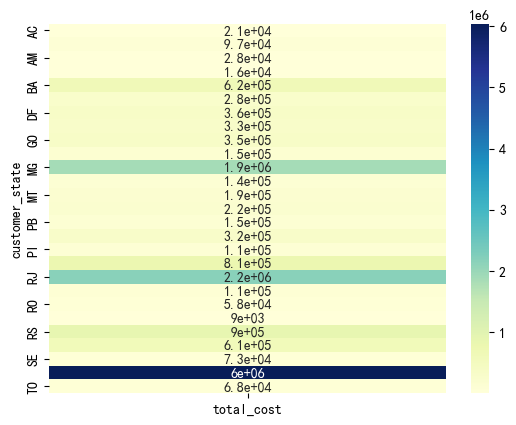

In [62]:
# sns.heatmap(loc_sales1, annot=True, cmap='coolwarm', fmt=".2f")
sns.heatmap(loc_sales1.set_index('customer_state'), annot=True, cmap='YlGnBu')

In [63]:
# import plotly.express as px
# import geopandas as gpd
# zip_code['customer_zip_code_prefix']=zip_code['geolocation_zip_code_prefix']
# #精细地图式
# loc_sales2=pd.merge(loc_sales,zip_code,on='customer_zip_code_prefix')#连接地图坐标

In [64]:
# # fig = px.density_mapbox(loc_sales2,
# #                         lat='geolocation_lat',
# #                         lon='geolocation_lng',
# #                         z='total_cost',
# #                         radius=30,  # 热力半径
# #                         center=dict(lat=-23, lon=-46),  # 地图中心
# #                         zoom=3,     # 缩放级别
# #                         mapbox_style="stamen-terrain",  # 地图样式
# #                         title='地区销售额热力图')
# # fig.show()
# # 假设 loc_sales2 是你的数据框，包含 'geolocation_lat', 'geolocation_lng', 和 'total_cost' 列
# import plotly.express as px
###有些许问题
# # 生成热力图
# fig = px.density_map(
#     loc_sales2,
#     lat='geolocation_lat',
#     lon='geolocation_lng',
#     z='total_cost',
#     radius=30,  # 热力半径
#     title='地区销售额热力图'
# )

# # 配置地图样式、中心和缩放级别
# fig.update_layout(
#     mapbox_style="carto-positron",  # 可选地图样式：carto-positron, carto-darkmatter, stamen-terrain 等
#     mapbox_center={"lat": -23, "lon": -46},  # 设置地图中心
#     mapbox_zoom=3  # 设置缩放级别
# )

# # 如果需要使用 Mapbox 付费样式（如 satellite-streets），需提供 access token
# # fig.update_layout(
# #     mapbox_style="mapbox://styles/mapbox/satellite-streets-v11",
# #     mapbox_access_token="your_mapbox_token"  # 替换为你的 Mapbox Token
# # )

# fig.show()
